<a href="https://colab.research.google.com/github/AksenovEA/Test/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 45s 135ms/step - loss: 0.0345 - val_loss: 0.1058 - learning_rate: 5.0000e-04
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - loss: 0.0056 - val_loss: 0.0156 - learning_rate: 5.0000e-04
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - loss: 0.0041 - val_loss: 0.0043 - learning_rate: 5.0000e-04
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - loss: 0.0034 - val_loss: 0.0037 - learning_rate: 5.0000e-04
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - loss: 0.0030 - val_loss: 0.0052 - learning_rate: 5.0000e-04
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - loss: 0.0028 - val_loss: 0.0035 - learning_rate: 5.0000e-04
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - loss: 0.0025 - val_loss: 0.0030 - learning_rate: 5.0000e-04
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - loss: 0.0023 - val_loss: 0.0033 - learning_rate: 5.0000e-04
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - loss: 0.0022 - 

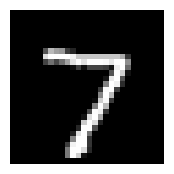

Изображение содержит рукописную цифру


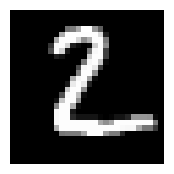

Изображение содержит рукописную цифру


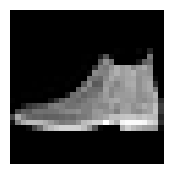

Изображение не содержит рукописной цифры


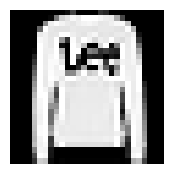

Изображение не содержит рукописной цифры


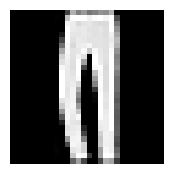

Изображение не содержит рукописной цифры


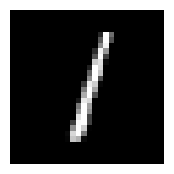

Изображение содержит рукописную цифру


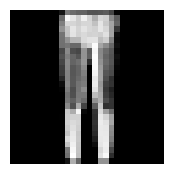

Изображение не содержит рукописной цифры


np.True_

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

(x_train_mnist, _), (x_test_mnist, _) = tf.keras.datasets.mnist.load_data()
(x_train_fashion, _), (x_test_fashion, _) = tf.keras.datasets.fashion_mnist.load_data()

x_train_mnist = x_train_mnist.astype('float32') / 255.0
x_test_mnist = x_test_mnist.astype('float32') / 255.0
x_train_mnist = np.expand_dims(x_train_mnist, axis=-1)
x_test_mnist = np.expand_dims(x_test_mnist, axis=-1)

x_test_fashion = x_test_fashion.astype('float32') / 255.0
x_test_fashion = np.expand_dims(x_test_fashion, axis=-1)

input_shape = (28, 28, 1)

def create_improved_autoencoder():
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.UpSampling2D((2, 2))(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.UpSampling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.UpSampling2D((2, 2))(x)

    x = layers.Cropping2D(((2, 2), (2, 2)))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    return Model(inputs, decoded)

autoencoder = create_improved_autoencoder()
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mse')

callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

autoencoder.fit(x_train_mnist, x_train_mnist,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_mnist, x_test_mnist),
                callbacks=callbacks,
                verbose=1)

def detect_anomalies(image):
    image_batch = np.expand_dims(image, axis=0)
    reconstruction = autoencoder.predict(image_batch, verbose=0)
    mse = np.mean(np.square(image - reconstruction[0]))
    return mse

mnist_reconstructions = autoencoder.predict(x_test_mnist[:2000], verbose=0)
mnist_errors = np.mean(np.square(x_test_mnist[:2000] - mnist_reconstructions), axis=(1, 2, 3))
threshold = np.percentile(mnist_errors, 90)

def test_image(image):
    mse = detect_anomalies(image)
    is_anomaly = mse > threshold

    plt.figure(figsize=(2, 2))
    plt.imshow(image.squeeze(), cmap='gray')
    plt.axis('off')
    plt.show()

    if is_anomaly:
        print("Изображение не содержит рукописной цифры")
    else:
        print("Изображение содержит рукописную цифру")

    return is_anomaly

test_image(x_test_mnist[0])
test_image(x_test_mnist[1])
test_image(x_test_fashion[0])
test_image(x_test_fashion[1])
test_image(x_test_fashion[2])
test_image(x_test_mnist[2])
test_image(x_test_fashion[3])